In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df = df1[['Review Text', 'Rating', 'Class Name', 'Age']]
df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Counting the Occurrences of Certain words

In [3]:
# Importing CountVectorizer() 
from sklearn.feature_extraction.text import CountVectorizer


# fill the NA values by space 
df['Review Text'] = df['Review Text'].fillna('')

# Count Vectorizer() convert a collection of text
# to a matrix of token count 
vectorizer = CountVectorizer() 

# Assigning a hosrter name for the analysze tokenizes the string 
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty 
    if analyzer(s):
        d = {}
        # Find counts of vocabularies and transform to arrays 
        w = vectorizer.fit_transform([s]).toarray()
        # Vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # item's transform the dictionary's (word, index) tuple pairs 
        for k, v in vc.items(): 
            d[v] = k  # d --> index: work
        for index, i in enumerate(w[0]):
            c[d[index]] = i  # c -> word: count 
    return c

# add new column to the dataframe 
df['Word Counts'] = df['Review Text'].apply(wordcounts)
df.head()    
    

,Review Text,Rating,Class Name,Age,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


Selected Words
love     8200
great    5685
super    1562
happy     674
glad      596
dtype: int64

Class Names
Dresses     5481
Knits       4227
Blouses     2703
Sweaters    1233
Pants       1231
Name: Class Name, dtype: int64


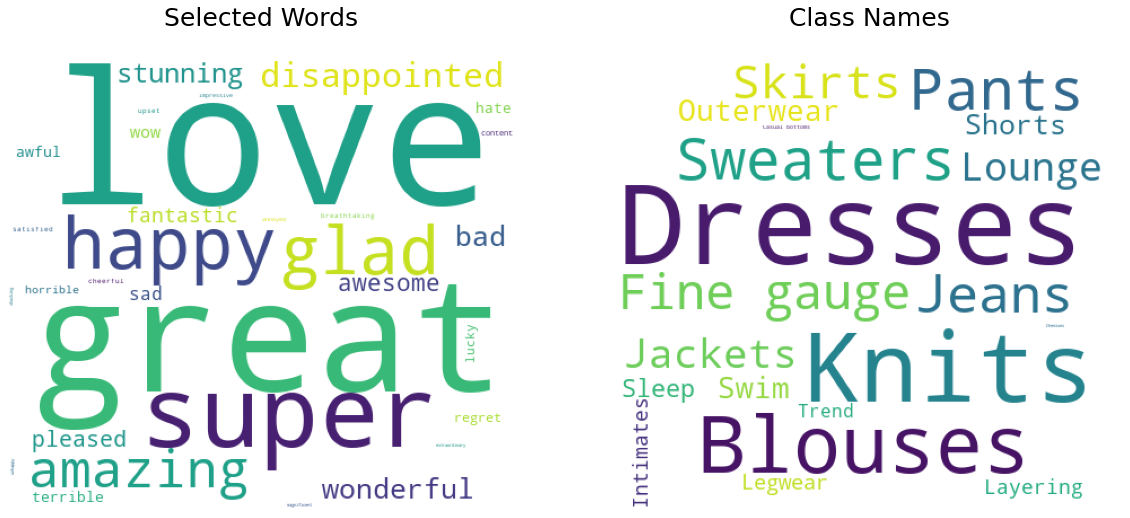

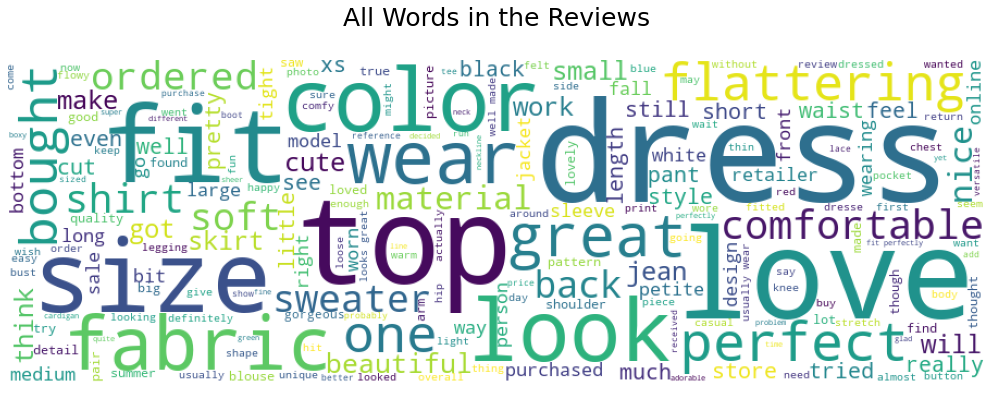

In [24]:
from wordcloud import WordCloud
# selecting some words to examine detailed 
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()  
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

print('\nClass Names')
print(df['Class Name'].fillna("Empty").value_counts().iloc[:5])

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

rt = df['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

## Splitting the data into Train and Test 

In [4]:
from sklearn.model_selection import train_test_split
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral 

df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >= 4
df.head() 

# split data 
train_data, test_data = train_test_split(df, train_size=0.8, random_state = 0)

# Select the columns and prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']

X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

## Logistic Regression 

In [15]:
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

start = dt.datetime.now() 
lr = LogisticRegression() 
lr.fit(X_train, y_train)
print('Logistic Regression Elapsed Time: ', str(dt.datetime.now() - start))

Logistic Regression Elapsed Time:  0:00:00.630151


## Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
start = dt.datetime.now() 
nb = MultinomialNB() 
nb.fit(X_train, y_train)
print('MultinomialNB Elapsed Time: ', str(dt.datetime.now() - start))

MultinomialNB Elapsed Time:  0:00:00.012867


## Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC
svm = SVC() 
svm.fit(X_train, y_train)
print('Support Vector Classifier Elapsed Time: ', str(dt.datetime.now() - start))

Support Vector Classifier Elapsed Time:  0:02:29.998983


## Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier() 
nn.fit(X_train, y_train)
print('MLPClassifier Elapsed Time: ', str(dt.datetime.now() - start))

MLPClassifier Elapsed Time:  0:04:10.541035


## Evaluating Models

In [9]:
# Adding Results to the Dataframe9hCSaH

df2 = test_data.copy() 
df2['Logistic Regression'] = lr.predict(X_test)
df2['Naive Bayes'] = nb.predict(X_test)
df2['SVM'] = svm.predict(X_test)
df2['Neural Network'] = nn.predict(X_test)
df2.head() 

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
261,This top is very cute. got it in the lighter c...,5,Blouses,50,"{'also': 1, 'and': 1, 'blue': 1, 'color': 2, '...",True,True,True,True,True
6466,I love the color of this top. it is a dark oli...,4,Knits,44,"{'and': 3, 'at': 1, 'blazer': 1, 'casual': 1, ...",True,True,True,True,True
9853,I like the color and design. it looked super c...,4,Dresses,32,"{'and': 3, 'be': 1, 'before': 1, 'brought': 1,...",True,False,False,False,False
20688,"I love this tunic, the detail the weight, the ...",4,Sweaters,54,"{'better': 1, 'big': 1, 'but': 1, 'detail': 1,...",True,True,True,True,True
10497,I ordered this dress online. the colors are pr...,2,Dresses,34,"{'and': 2, 'are': 2, 'baby': 1, 'bump': 1, 'ch...",False,True,True,True,True


## Checking Accuracy of the model 

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score_lr = accuracy_score(y_test, df2['Logistic Regression'])
accuracy_score_nb = accuracy_score(y_test, df2['Naive Bayes'])
accuracy_score_svm = accuracy_score(y_test, df2['SVM'])
accuracy_score_nn = accuracy_score(y_test, df2['Neural Network'])


print('Logistic Regression : ', accuracy_score_lr)
print('Naive Bayes : ', accuracy_score_nb)
print('SVC : ', accuracy_score_svm)
print('Neural Network : ', accuracy_score_nn)


Logistic Regression :  0.9396070822216832
Naive Bayes :  0.9417899587678875
SVC :  0.9289352413291293
Neural Network :  0.9333009944215377


## Confusion Matrix

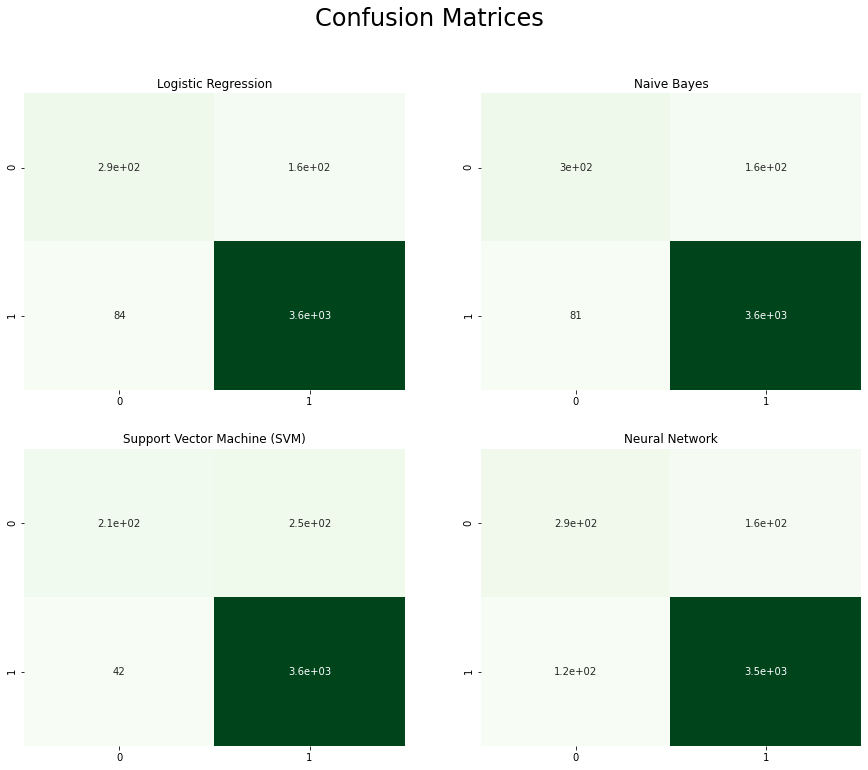

In [22]:
# It can be seen that SVM does not give healthy results (High number of False Positives)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# preparation for the confusion matrix
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="Greens",cbar=False);